In [4]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import random
import stats


# Setup

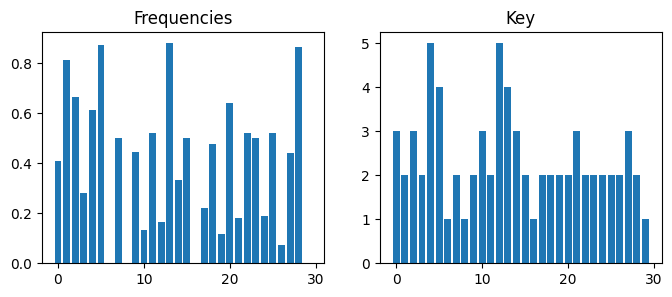

323254121232543212222322222321
[0.4074074074074074, 0.8125, 0.6666666666666666, 0.28, 0.6111111111111112, 0.875, 0.0, 0.5, 0.0, 0.4444444444444444, 0.13333333333333333, 0.52, 0.16666666666666666, 0.88, 0.3333333333333333, 0.5, 0.0, 0.2222222222222222, 0.47619047619047616, 0.11764705882352941, 0.64, 0.18181818181818182, 0.52, 0.5, 0.19047619047619047, 0.5217391304347826, 0.07142857142857142, 0.44, 0.8666666666666667, 0.0]


In [5]:
# Setup message
full = "22411111321211111120311411241111311130121141111112111211222032421512112111303241111411111211112012242114111212212011115224122121112012151111412221230122422412212111201134111141111121211101215112411121223012151341112212120121111222412111221203152114111221113011342242122211201224211412112111303151124121112212031521141112211112012151124112111123031511241221111130121142211112121121301211111111242111212110121142114122212303151115121121230324224212221120311411241123121203151342121111"
full_split = full.split("0")
full_split[0] = "1" + full_split[0]

# Extract key and frequencies
key = [ "1" for _ in range(30) ]
counters = [ [0, 0] for _ in range(30) ]
for msg in full_split:
    ptr = 0
    for c in msg:
        if c != "1":
            counters[ptr][0] += 1
            key[ptr] = c
        counters[ptr][1] += 1
        ptr += int(c)
key = "".join(key)
freq = [ c[0] / c[1] for c in counters ]

# Random message generator
def random_cessation(key, freq, length):
    ct = ""
    ptr = 0
    for _ in range(length):
        choice = key[ptr] if (random.random() < freq[ptr]) else "1"
        ct += choice
        ptr += int(choice)
        if ptr >= 30:
            ct += "0"
            ptr = 0
    return ct

# Plot key and frequencies
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
axes[0].bar(range(30), freq)
axes[1].bar(range(30), [ int(c) for c in key ])
axes[0].set_title("Frequencies")
axes[1].set_title("Key")
plt.show()
print(key)
print(freq)

In [7]:
for msg in full_split:
    print(msg)

12241111132121111112
31141124111131113
121141111112111211222
324215121121113
3241111411111211112
12242114111212212
11115224122121112
1215111141222123
1224224122121112
11341111411111212111
1215112411121223
1215134111221212
1211112224121112212
3152114111221113
113422421222112
12242114121121113
3151124121112212
31521141112211112
12151124112111123
3151124122111113
1211422111121211213
121111111124211121211
1211421141222123
315111512112123
32422421222112
3114112411231212
3151342121111


# Usage

## Visualization

In [18]:
def msgs_to_im(msgs, fill=0):
    ml = max([len(msg) for msg in msgs])
    im = np.zeros((len(msgs), ml), dtype=np.uint8)
    for i, msg in enumerate(msgs):
        for j, x in enumerate(msg):
            im[i, j] = int(x)
        for j in range(len(msg), ml):
            im[i, j] = fill
    return im

def auto_rl_encode(msg, mapping=None):
    if mapping is None:
        mapping = { "0": 0, "1": 1, "2": 2, "3": 3, "4": 4, "5": 5 }
    return "".join([ c * mapping[c] for c in msg ])


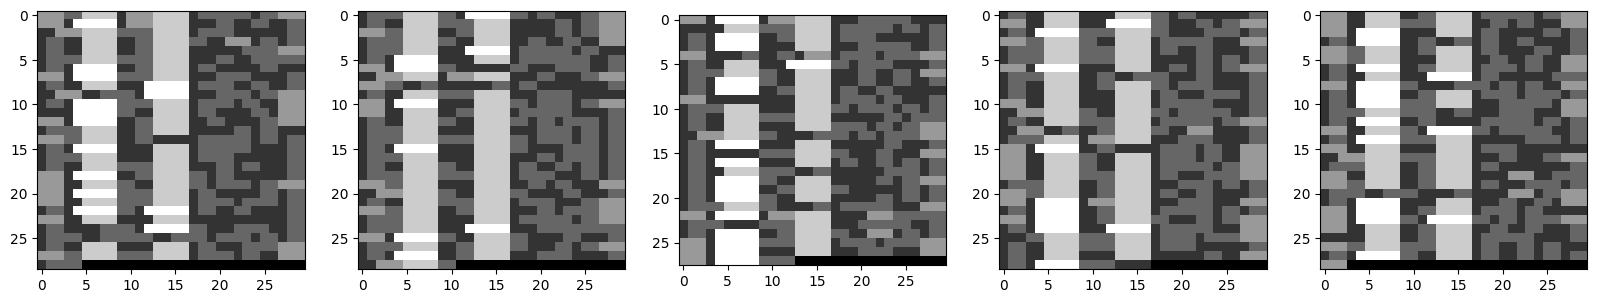

In [19]:
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i in range(5):
    rnd = random_cessation(key, freq, len(full))
    rnd_split = rnd.split("0")
    rnd_split_rle = [ auto_rl_encode(msg) for msg in rnd_split ]
    im = np.array(msgs_to_im(rnd_split_rle, fill=0))
    axes[i].imshow(im, cmap="gray")

plt.show()


## Pattern Testing

In [20]:
def count_patterns(msgs):
    set_a = set()
    set_b = set()

    for msg in msgs:
        i = 0
        sum = 0

        # Get pattern for 9
        pattern = ""
        while sum < 9:
            if i >= len(msg):
                break
            pattern += "1" if (msg[i] != "1") else "0"
            sum += int(msg[i])
            i += 1
        set_a.add(pattern)

        # Get pattern for 8
        pattern = ""
        while sum < 17:
            if i >= len(msg):
                break
            pattern += "1" if (msg[i] != "1") else "0"
            sum += int(msg[i])
            i += 1
        set_b.add(pattern)
    
    return set_a, set_b


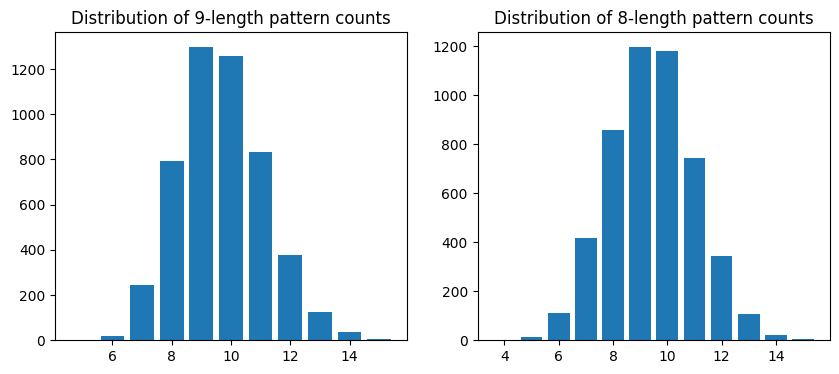

In [27]:
# Get pattern counts for random messages
samples_a = []
samples_b = []
for i in range(5000):
    rnd = random_cessation(key, freq, len(full))
    patterns = count_patterns(rnd.split("0"))
    samples_a.append(len(patterns[0]))
    samples_b.append(len(patterns[1]))

# Plot distributions of each
counter_a = Counter(samples_a)
counter_b = Counter(samples_b)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].bar(counter_a.keys(), counter_a.values())
axes[0].set_title("Distribution of 9-length pattern counts")
axes[1].bar(counter_b.keys(), counter_b.values())
axes[1].set_title("Distribution of 8-length pattern counts")
plt.show()


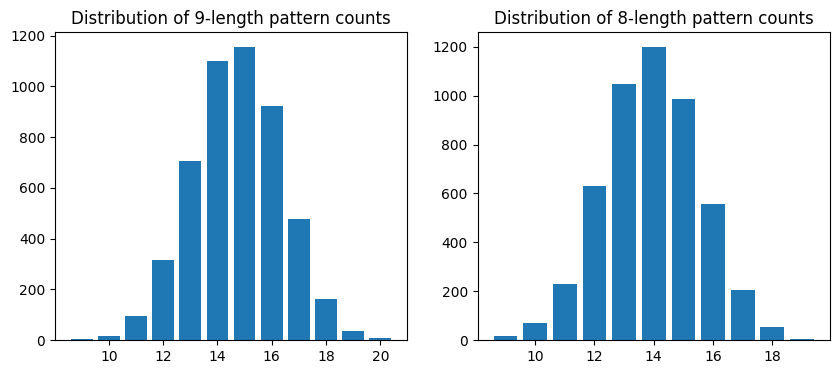

14.724 1.6493538351774986
13.919 1.6254745256344982
2.864151948021279
2.410988261086548


In [28]:
freq_rnd = [ 0.5 for _ in range(30) ]

# Get pattern counts for random messages
samples_a = []
samples_b = []
for i in range(5000):
    rnd = random_cessation(key, freq_rnd, len(full))
    patterns = count_patterns(rnd.split("0"))
    samples_a.append(len(patterns[0]))
    samples_b.append(len(patterns[1]))

# Plot distributions of each
counter_a = Counter(samples_a)
counter_b = Counter(samples_b)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].bar(counter_a.keys(), counter_a.values())
axes[0].set_title("Distribution of 9-length pattern counts")
axes[1].bar(counter_b.keys(), counter_b.values())
axes[1].set_title("Distribution of 8-length pattern counts")
plt.show()

# Calculate mean and std for each
mean_a = stats.mean(samples_a)
mean_b = stats.mean(samples_b)
std_a = stats.stdev(samples_a)
std_b = stats.stdev(samples_b)

# Print results
print(mean_a, std_a)
print(mean_b, std_b)
print((mean_a - 10) / std_a)
print((mean_b - 10) / std_b)
